10000
(10000,)
10000
(10000,)


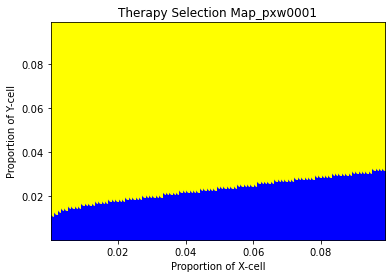

In [1]:
## CellDep-XY-AB-BA-C

import numpy as np 
import matplotlib as mpl
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

def dyna(x, t, *arg):
    (qxw, pxw, qzw, pzw, qzx, pzx, qzy, pzy, a, b, c, f, g, h, k, p, q ) = arg
    dw = ((qxw*(x[1]/(x[0]+α)))/(pxw+(x[1]/(x[0]+α))) + ((qzw*(x[3]/(x[0]+α)))/(pzw+(x[3]/(x[0]+α))))+a)*x[0] 
    dx = g*x[0] + (((qzx*(x[3]/(x[1]+α)))/(pzx+(x[3]/(x[1]+α))))+b)*x[1]
    dy = h*x[0] + (((qzy*(x[3]/(x[2]+α)))/(pzy+(x[3]/(x[2]+α))))+c)*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz])

def dynb(x, t, *arg):
    (qyw, pyw, qzw, pzw, qzx, pzx, qzy, pzy, a, b, c, f, g, h, k, p, q ) = arg
    dw = ((qyw*(x[2]/(x[0]+α)))/(pyw+(x[2]/(x[0]+α))) + ((qzw*(x[3]/(x[0]+α)))/(pzw+(x[3]/(x[0]+α))))+a)*x[0] 
    dx = g*x[0] + (((qzx*(x[3]/(x[1]+α)))/(pzx+(x[3]/(x[1]+α))))+b)*x[1]
    dy = h*x[0] + (((qzy*(x[3]/(x[2]+α)))/(pzy+(x[3]/(x[2]+α))))+c)*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz])

def dync(x, t, *arg):
    (qzw, pzw, qzx, pzx, qzy, pzy, a, b, c, f, g, h, k, p, q ) = arg
    dw = ((qzw*(x[3]/(x[0]+α)))/(pzw+(x[3]/(x[0]+α)))+a)*x[0] 
    dx = g*x[0] + (((qzx*(x[3]/(x[1]+α)))/(pzx+(x[3]/(x[1]+α))))+b)*x[1]
    dy = h*x[0] + (((qzy*(x[3]/(x[2]+α)))/(pzy+(x[3]/(x[2]+α))))+c)*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz])

α = 0.00000001

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=10)
    ax.set_ylabel("$y$", fontsize=10)
    ax.set_zlabel("$z$", fontsize=10)
    
initial_N = 10**9
# X = 10**7
# Y = 10**7
# Z = 10
# W = initial_N-X-Y-Z

t_end = 1000
tana = 307
tanb = 567

qxw = 0.08
pxw = 0.001
qyw = 0.08
pyw = 0.0009

qzwA = 0.06
qzwB = 0.06
pzwA = 0.0009
pzwB = 0.0009
qzxA = 0.07
qzxB = 0.07
pzxA = 0.0009
pzxB = 0.0009
qzyA = 0.007
qzyB = 0.007
pzyA = 0.0009
pzyB = 0.0009

qzwC = 0.2
pzwC = 0.0009
qzxC = 0.025
pzxC = 0.0009
qzyC = 0.025
pzyC = 0.0009

a = -0.064
b = -0.03355
c = -0.03355

aA = -0.17
bA = 0.008
cA = -0.137

aB = -0.321
bB = -0.187
cB = 0.0203

fA = 0.022
fB = 0.022
gA = 0.0000001
gB = 0.0000001
hA = 0.0000001 
hB = 0.0000001 
kA = 0.0000001 
kB = 0.0000001 
pA = 0.0000001 
pB = 0.0000001 
qA = 0.0000001
qB = 0.0000001

f = 0.022
g = 0.0000001 
h = 0.0000001 
k = 0.0000001
p = 0.0000001 
q = 0.0000001

paramsA = (qxw, pxw, qzwA, pzwA, qzxA, pzxA, qzyA, pzyA, aA, bA, cA, fA, gA, hA, kA, pA, qA )
paramsB = (qyw, pyw, qzwB, pzwB, qzxB, pzxB, qzyB, pzyB, aB, bB, cB, fB, gB, hB, kB, pB, qB )
paramsC = (qzwC, pzwC, qzxC, pzxC, qzxC, pzyC, a, b, c, f, g, h, k, p, q )

finalnumbera = list()
finalnumberb = list()
finalnumberc = list()

list_ta = np.arange(0, tana, 0.01)
list_t1a = np.arange(tana, t_end, 0.01)
list_tb = np.arange(0, tanb, 0.01)
list_t1b = np.arange(tanb, t_end, 0.01)
list_tc = np.arange(0, t_end, 0.01)
xprop = list()
yprop = list()

for x in np.arange(100000, 10**8, 1000000):
    for y in np.arange(100000, 10**8, 1000000):
        xprop.append((x)/initial_N)
        yprop.append((y)/initial_N)
        cell_init = [initial_N - x - y - 10, x, y, 10]
        cellsa = odeint(dyna, cell_init, list_ta, args = paramsA)
        ia = len(list_ta)-1
        cell1_inita = [cellsa[ia, 0], cellsa[ia, 1], cellsa[ia, 2], cellsa[ia, 3]]
        cell1a = odeint(dynb, cell1_inita, list_t1a, args = paramsB)
        celltotal1a = cell1a[:, 0] + cell1a[:, 1] + cell1a[:, 2] + cell1a[:, 3]
        finalnumbera.append(celltotal1a[-1])
        cellsb = odeint(dynb, cell_init, list_tb, args = paramsB)
        ib = len(list_tb)-1
        cell1_initb = [cellsb[ib, 0], cellsb[ib, 1], cellsb[ib, 2], cellsb[ib, 3]]
        cell1b = odeint(dyna, cell1_initb, list_t1b, args = paramsA)
        celltotal1b = cell1b[:, 0] + cell1b[:, 1] + cell1b[:, 2] + cell1b[:, 3]
        finalnumberb.append(celltotal1b[-1])
        cellsc = odeint(dync, cell_init, list_tc, args = paramsC)
        celltotalc = cellsc[:, 0] + cellsc[:, 1] + cellsc[:, 2] + cellsc[:, 3]
        finalnumberc.append(celltotalc[-1])

X = np.array(xprop)
print(len(xprop))
print(X.shape)
Y = np.array(yprop)
print(len(yprop))
print(Y.shape)
A = np.array(finalnumbera)
B = np.array(finalnumberb)
C = np.array(finalnumberc)
# fig = plt.figure()
# ax = fig.add_subplot(111)
min_indices = np.argmin([A, B, C], axis=0)

# Create a scatter plot with color-coded markers
colors = ['yellow', 'blue', 'red']
for i in range(len(xprop)):
    plt.scatter(X[i], Y[i], color=colors[min_indices[i]])

plt.xlabel('Proportion of X-cell')
plt.ylabel('Proportion of Y-cell')
plt.title('Therapy Selection Map_pxw0001')
plt.xlim([min(X), max(X)])
plt.ylim([min(Y), max(Y)])
# plt.yscale('log')
# plt.xscale('log')
plt.show()